# Exploratory Data Analysis for IMDb Reviews Dataset

This notebook aims to perform initial Exploratory Data Analysis (EDA) on the IMDb Reviews dataset. In this first step, we will import the necessary libraries used for data manipulation, visualization, and text preprocessing. This setup forms the foundation for reading in the data, cleaning it, and eventually visualizing its key properties.


In [17]:
# Import core libraries for data analysis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import glob
import re

import nltk

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

The NLTK library provides tools necessary for text preprocessing. In the cell below, we download the NLTK 'stopwords' package if it has not been downloaded before. This will help us later when cleaning and processing the text data.

In [12]:
# # Download the NLTK stopwords dataset (if not already downloaded)
# nltk.download('stopwords')

In [13]:
data_file = '/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'

# Load the CSV data into a DataFrame
df = pd.read_csv(data_file)

# Display basic information about the DataFrame
print("Dataset shape:", df.shape)
print(df.info())

# Preview the first 5 rows of the dataset
df.head()


Dataset shape: (50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Inspecting the Dataset and Calculating Descriptive Statistics

Now that the data is loaded, we will inspect the dataset by looking at some basic statistics and distribution properties. In this section, we will:
- Add a new column for the length of each review (to analyze text lengths).
- Print basic descriptive statistics for the review lengths.
- Display the distribution of sentiment labels.


**Observations from the Distribution of Review Lengths:**

- The distribution is right-skewed: most reviews are moderate in length.
- A majority of reviews fall within a few hundred to a couple thousand characters.
- There are outliers with extremely short or very long reviews.
- These variations suggest the need for preprocessing steps like truncation or padding during modeling.

---

Average review length: 1309.43102
Maximum review length: 13704
Minimum review length: 32

Sentiment label counts:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


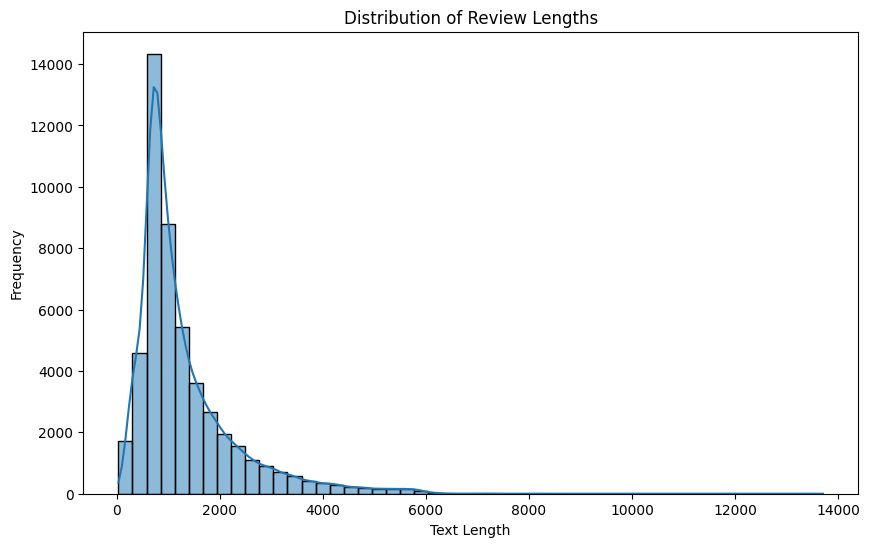

In [15]:
# Create a new column 'text_length' representing the length of each review
df['text_length'] = df['review'].apply(len)

# Display basic statistics about the review lengths
print("Average review length:", df['text_length'].mean())
print("Maximum review length:", df['text_length'].max())
print("Minimum review length:", df['text_length'].min())

# Count the number of instances for each sentiment label
print("\nSentiment label counts:")
print(df['sentiment'].value_counts())


In [ ]:
# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

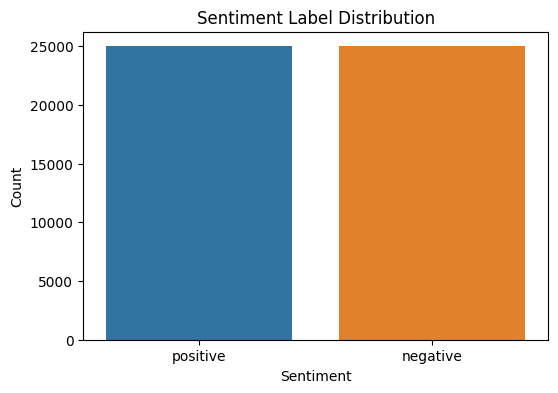

In [16]:
# Plot the distribution of sentiment labels
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

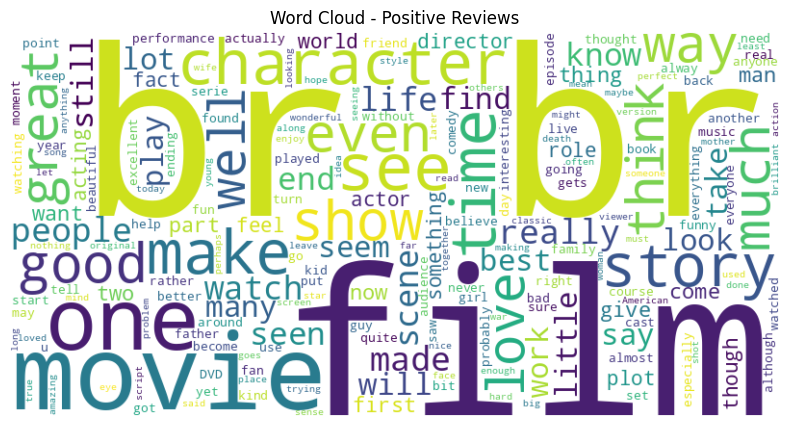

In [24]:
# Join all positive reviews into one string.
positive_reviews = " ".join(df[df['sentiment'] == 'positive']['review'])

# Generate the word cloud.
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud - Positive Reviews')
plt.axis('off')
plt.show()

- In this bar chart, we see the most frequent tokens in the IMDb Reviews dataset. Notably, the token br appears more often than any other token. This is because many of the reviews in the dataset contain raw HTML markup, including the <br> tag for line breaks, and our current preprocessing steps have not stripped these tags out. As a result, the line-break tag becomes a recognized “word” in the vocabulary.

- We also observe other common words such as “movie,” “film,” “like,” “just,” and “good,” which makes sense given that these are movie reviews and such terms naturally appear often. Going forward, we should remove HTML tags (like `<br>`) during data cleaning to ensure that our token frequency analysis and subsequent modeling focus on genuine words relevant to sentiment analysis.

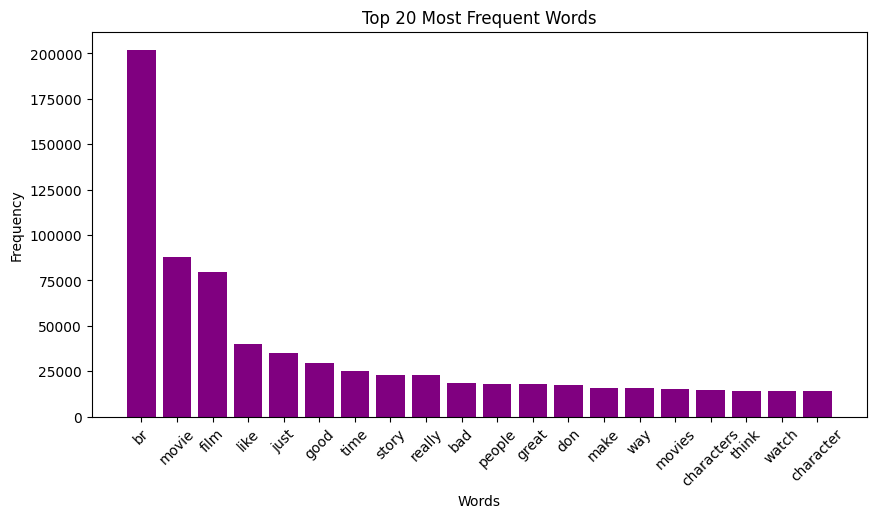

In [25]:
# Visualize Top 20 Most Frequent Words

# Initialize CountVectorizer with English stop words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])

# Sum the word counts
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)))

# Sort the dictionary by frequency in descending order and select the top 20 words
word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
top_words = dict(list(word_freq.items())[:20])

plt.figure(figsize=(10, 5))
plt.bar(top_words.keys(), top_words.values(), color='purple')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

## Conclusion

The exploratory data analysis has provided several key insights into the IMDb Reviews dataset:

- **Sentiment Distribution:**  
  The bar chart illustrates a roughly balanced count between positive and negative reviews.

- **Review Length:**  
  The histogram of word counts indicates a wide variability in review lengths, suggesting that preprocessing should accommodate both very short and long reviews.

- **Common Words and HTML Artifacts:**  
  The frequency plot reveals that apart from meaningful words like "movie" and "film", tokens such as `br` appear frequently. This is due to the presence of raw HTML tags (e.g., `<br>`) in the reviews, which were not removed during data collection.

**Next Steps for Data Processing:**

1. **HTML Tag Removal:**  
   Prior to further analysis or model training, implement a preprocessing step to strip out HTML tags using regular expressions or libraries like BeautifulSoup.

2. **Text Normalization:**  
   Convert text to lowercase, remove punctuation, and eliminate stop words to standardize the data.

3. **Tokenization and Lemmatization/Stemming:**  
   Break text into tokens and optionally apply lemmatization or stemming to reduce word variations.

4. **Feature Extraction:**  
   Consider using methods like TF-IDF or pre-trained embeddings (e.g., BERT) for capturing more semantic meaning in text.

These preprocessing steps will enhance the quality of your feature set and improve the performance of subsequent sentiment analysis models.
